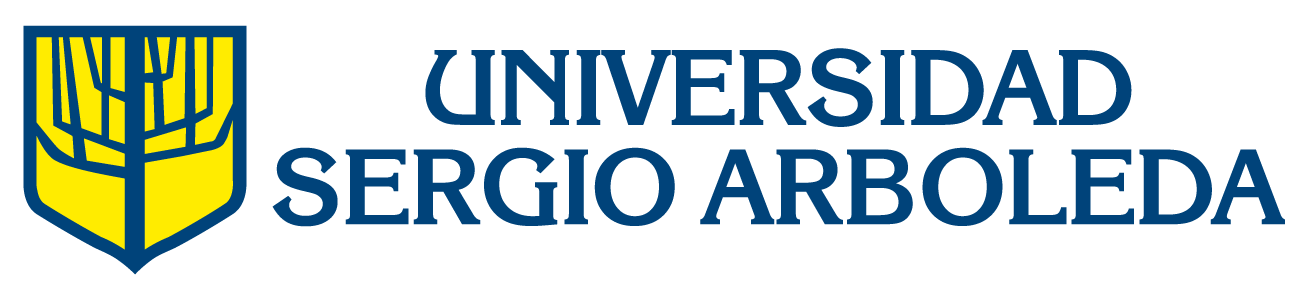


---





# **C2 - DFT IDFT**

**Autores:**  

* Carlos Mario Bermúdez Galván

* Miguel Angel Thomas


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de imágenes


# **Requerimientos**

La transformada de Fourier en 2D, es la expansión de una serie de una función de imagen en el domino espacial 2D, en particular en términos de funciones coseno ortonormales.

1. Cargue una imagen

2. Convierta la imagen a monocromática (escala de grises)

3. Calcule la transformada de Fourier de la imagen. Utilice la librería de su preferencia.

4. Cree una máscara y utilícela para cambiar la información de la imagen en el dominio de las frecuencias

5. Reconstruya la imagen en el dominio espacial

6. Repita los pasos 4 y 5 con diferentes máscaras

7. Elija otra imagen y repita los pasos 2 a 6

8. Escriba un pequeño texto en donde explique como afecta la selección de la máscara el procesamiento de la imagen en el dominio de la frecuencia.

In [355]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## __1.Cargue una Imagen__

In [356]:
url_img_01 = "https://raw.githubusercontent.com/carlosbermudezgalvan/Datasets/main/actividad%20furier/Imagen01.png"
url_img_02 = "https://raw.githubusercontent.com/carlosbermudezgalvan/Datasets/main/actividad%20furier/Imagen02.png"

In [357]:
# Descargar imagenes
!wget -O Imagen01.png $url_img_01
!wget -O Imagen02.png $url_img_02

--2024-04-12 13:31:31--  https://raw.githubusercontent.com/carlosbermudezgalvan/Datasets/main/actividad%20furier/Imagen01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258269 (252K) [image/png]
Saving to: ‘Imagen01.png’

Imagen01.png        100%[===================>] 252.22K  --.-KB/s    in 0.03s   

2024-04-12 13:31:31 (7.62 MB/s) - ‘Imagen01.png’ saved [258269/258269]

--2024-04-12 13:31:31--  https://raw.githubusercontent.com/carlosbermudezgalvan/Datasets/main/actividad%20furier/Imagen02.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response.


#__Imagen 1__

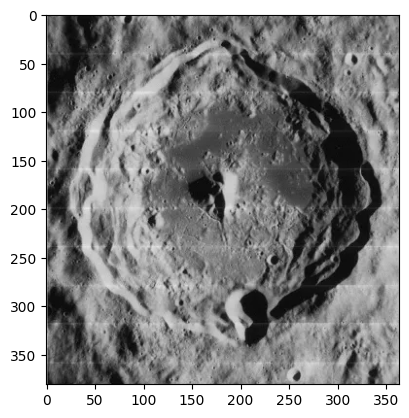

In [358]:
# Cargar una sola imagen
img_01 = cv2.imread('/content/Imagen02.png')
plt.imshow(img_01)

In [359]:
# Dimensiones
img_01.shape

(381, 364, 3)

## __2.Convierta la imagen a monocromatica__

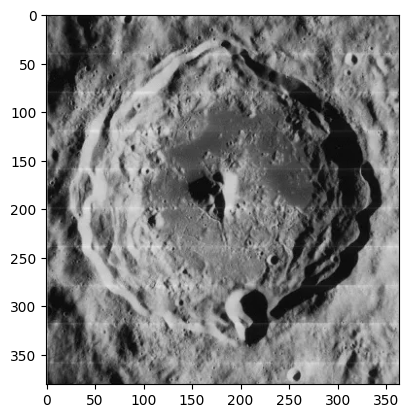

In [360]:
img_01_gray = cv2.cvtColor(img_01,cv2.COLOR_BGR2GRAY)
plt.imshow(img_01_gray, cmap='gray')

In [361]:
# Confirmar proceso viendo que ya no hayan tres canales
img_01_gray.shape

(381, 364)

## __3.Calcule la transformada de fourier__

In [362]:
frec = np.fft.fft2(img_01_gray)
frec = np.fft.fftshift(frec) #transformada ya centrada
frec_abs = np.abs(frec)
magnitud_espectro = 20*np.log(frec_abs)

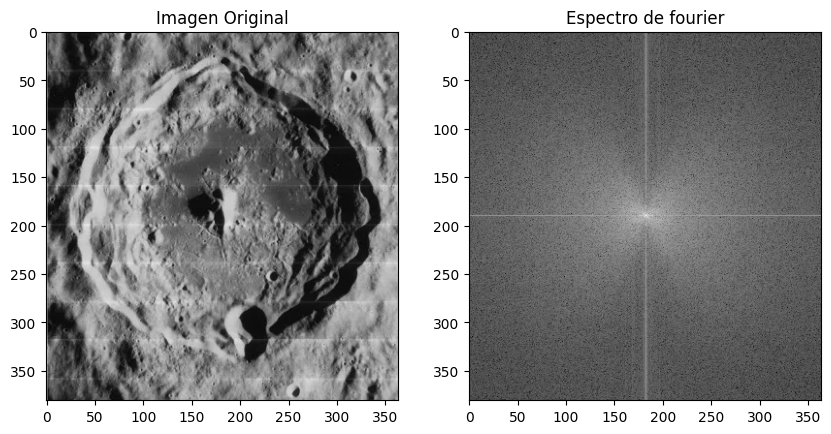

In [363]:
# Viusalizar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_01_gray, cmap='gray')
axs[0].set_title('Imagen Original')
axs[1].imshow(magnitud_espectro, cmap='gray')
axs[1].set_title('Espectro de fourier')
plt.show()

In [364]:
magnitud_espectro

array([[169.31184937, 132.06643255, 146.58949758, ..., 145.56748054,
        132.46647124, 131.71263902],
       [135.03442617, 129.86558751, 130.39501589, ..., 123.18960305,
        142.83436302, 139.54008877],
       [148.75684089, 152.21809014, 149.45262159, ..., 141.08963696,
        132.51366862, 143.09093414],
       ...,
       [148.75684089, 143.09093414, 132.51366862, ..., 112.04511314,
        149.45262159, 152.21809014],
       [135.03442617, 139.54008877, 142.83436302, ..., 136.41959775,
        130.39501589, 129.86558751],
       [169.31184937, 131.71263902, 132.46647124, ..., 132.02126253,
        146.58949758, 132.06643255]])

In [365]:
print(f'shape - frecuencia: {frec.shape}')
print(f'shape - espectro de magnitud: {magnitud_espectro.shape}')

shape - frecuencia: (381, 364)
shape - espectro de magnitud: (381, 364)


## __4.Cree una máscara y utilícela para cambiar la información de la imagen en el dominio de las frecuencias__

### __Filtro de sobel__

In [366]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

# grad_x: identifica el gradiente en x para señalar los Bordes en x
grad_x = cv2.Sobel(img_01_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(img_01_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

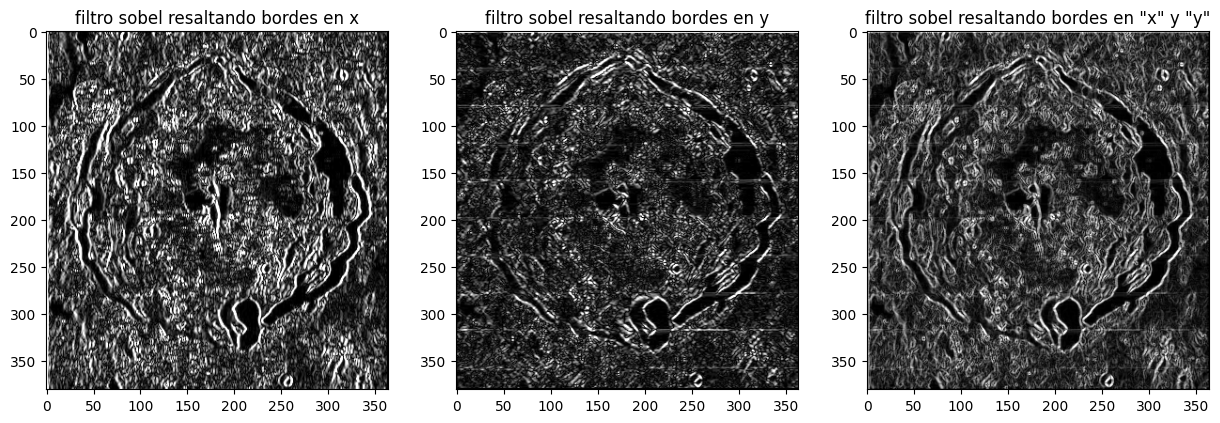

In [367]:
fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].imshow(abs_grad_x, cmap='gray')
axs[0].set_title('filtro sobel resaltando bordes en x')
axs[1].imshow(abs_grad_y, cmap='gray')
axs[1].set_title('filtro sobel resaltando bordes en y')
axs[2].imshow(grad, cmap='gray')
axs[2].set_title('filtro sobel resaltando bordes en "x" y "y"')
plt.show()

#### Espectros del filtro

Text(0.5, 1.0, 'Espectro del filtro "x" y "y"')

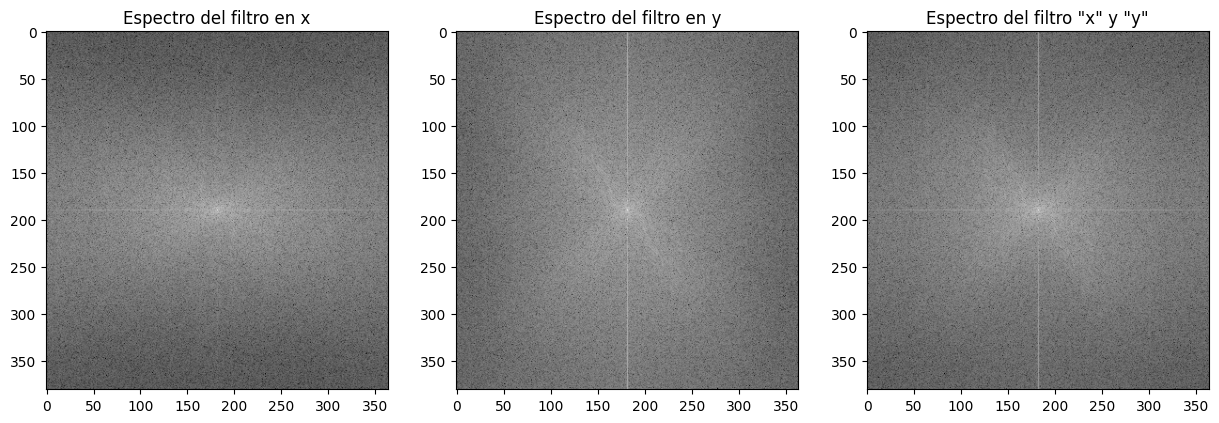

In [368]:
me_abs_x = np.fft.fft2(abs_grad_x)
me_abs_x = np.fft.fftshift(me_abs_x) # Para mover las frecuencias al centro
me_abs_x = np.abs(me_abs_x) # Calcula la magnitud del arreglo de las frecuencias
me_abs_x = 20*np.log(me_abs_x) # espectro en escala logaritmica

me_abs_y = np.fft.fft2(abs_grad_y)
me_abs_y = np.fft.fftshift(me_abs_y)
me_abs_y = np.abs(me_abs_y)
me_abs_y = 20*np.log(me_abs_y)

me_abs = np.fft.fft2(grad)
me_abs = np.fft.fftshift(me_abs)
me_abs = np.abs(me_abs)
me_abs = 20*np.log(me_abs)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].imshow(me_abs_x, cmap='gray')
axs[0].set_title('Espectro del filtro en x')
axs[1].imshow(me_abs_y, cmap='gray')
axs[1].set_title('Espectro del filtro en y')
axs[2].imshow(me_abs, cmap='gray')
axs[2].set_title('Espectro del filtro "x" y "y"')

### __Mascaras Pasa alto y pasa bajo__

In [369]:
# Crear una máscara pasa bajo
rows, cols = img_01_gray.shape
center_row, center_col = rows // 2, cols // 2
radius = 30
mask_lp = np.zeros((rows, cols), dtype=np.float64)
cv2.circle(mask_lp, (center_col, center_row), radius, 1, -1)

# Crear una máscara pasa alto (complemento de la máscara pasa bajo)
mask_hp = 1 - mask_lp

In [370]:
 # Aplicar las máscaras en el dominio de la frecuencia
frec_lp = frec * mask_lp
frec_hp = frec * mask_hp

#### Espectros

In [371]:
# Calcular la magnitud de los espectros con escala logarítmica
magnitud_espectro = 20 * np.log(np.abs(frec) + 1)
magnitud_espectro_lp = 20 * np.log(np.abs(frec_lp) + 1)
magnitud_espectro_hp = 20 * np.log(np.abs(frec_hp) + 1)

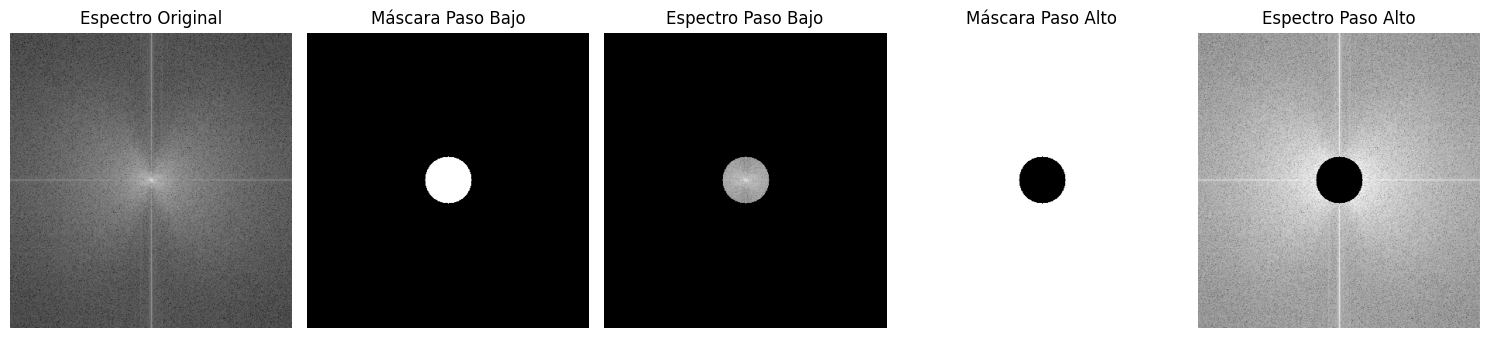

In [372]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(magnitud_espectro, cmap='gray')
plt.title('Espectro Original')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(mask_lp, cmap='gray')
plt.title('Máscara Paso Bajo')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(magnitud_espectro_lp, cmap='gray')
plt.title('Espectro Paso Bajo')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(mask_hp, cmap='gray')
plt.title('Máscara Paso Alto')
plt.axis('off')


plt.subplot(1, 5, 5)
plt.imshow(magnitud_espectro_hp, cmap='gray')
plt.title('Espectro Paso Alto')
plt.axis('off')


plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


## __5. Reconstruya la imagen en el dominio espacial__

### __Reconstruccion con filtro de sobel__

In [373]:
# Aplicar las máscaras a la transformada de Fourier
masks = [abs_grad_y, abs_grad_x, grad_x, grad_y]
titles = ['abs_grad_y', 'abs_grad_x', 'grad_x', 'grad_y']

reconstructed_images = []

for mask in masks:
    frecs = mask * frec
    #f_frecs = np.fft.ifftshift(frecs)
    img_back = np.fft.ifft2(frecs)
    img_back = np.abs(img_back)
    reconstructed_images.append(img_back)

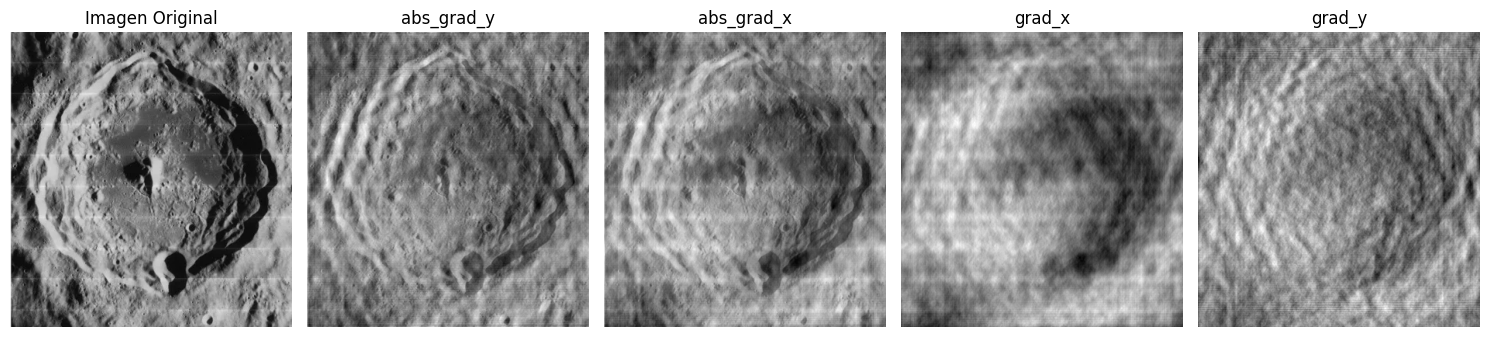

In [375]:
# Mostrar las imágenes originales y las reconstruidas
plt.figure(figsize=(15, 10))

plt.subplot(2, len(reconstructed_images) + 1, 1)
plt.imshow(img_01_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar las imágenes reconstruidas
for i, img in enumerate(reconstructed_images):
    plt.subplot(2, len(reconstructed_images) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'imagen filtrada')

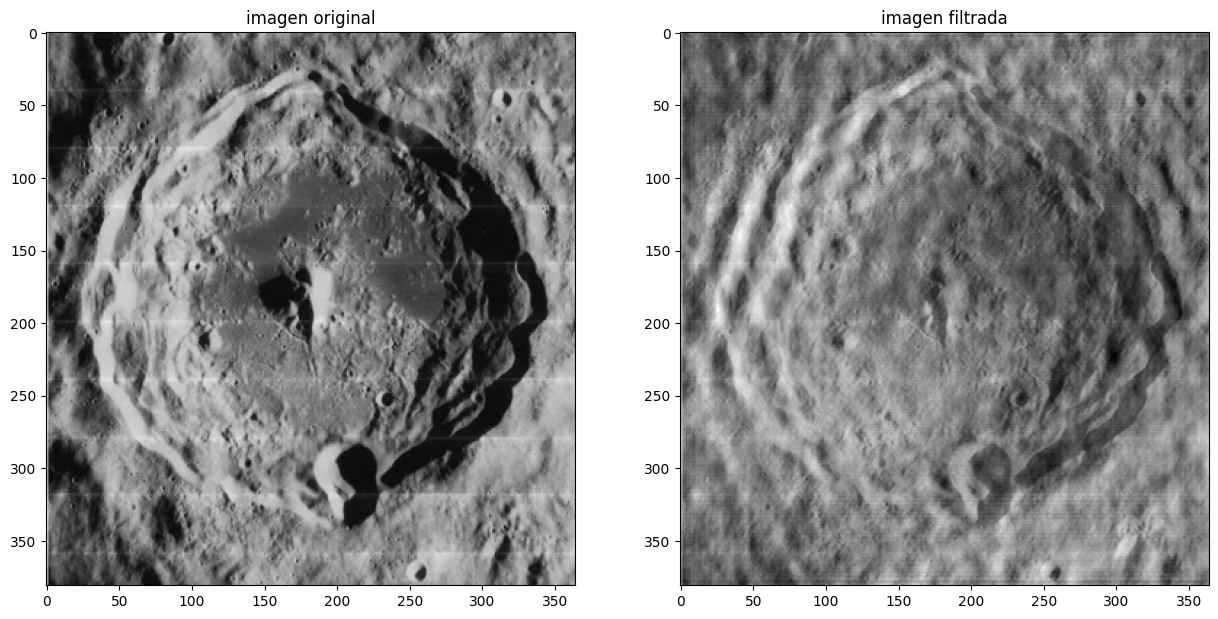

In [376]:
mask = abs_grad_y
frecs = mask * frec

#f_frecs = np.fft.ifftshift(frecs)
img_back = np.fft.ifft2(frecs)
img_back = np.abs(img_back)

fig, axs = plt.subplots(1,2, figsize = (15,15))
axs[0].imshow(img_01_gray, cmap='gray')
axs[0].set_title('imagen original')
axs[1].imshow(img_back, cmap='gray')
axs[1].set_title('imagen filtrada')

### Reconstruccion Mascaras pasa bajo y pasa alto

In [377]:
# Calcular la transformada inversa para obtener las imágenes modificadas
img_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(frec_lp))).astype(np.uint8)
img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(frec_hp))).astype(np.uint8)

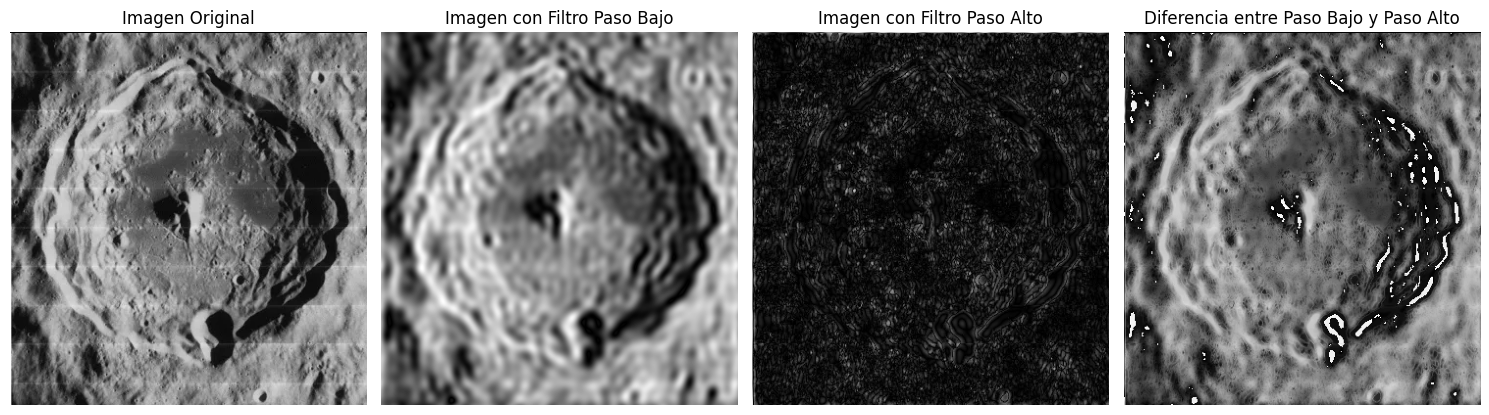

In [378]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_01_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_lp, cmap='gray')
plt.title('Imagen con Filtro Paso Bajo')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_hp, cmap='gray')
plt.title('Imagen con Filtro Paso Alto')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(np.abs(img_lp - img_hp), cmap='gray')
plt.title('Diferencia entre Paso Bajo y Paso Alto')
plt.axis('off')

plt.tight_layout()
plt.show()


#__Imagen 2__

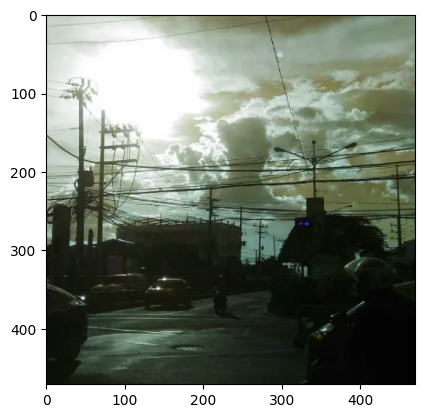

In [421]:
# Cargar una sola imagen
img_01 = cv2.imread('/content/Imagen01.png')
plt.imshow(img_01)

In [422]:
# Dimensiones
img_01.shape

(471, 470, 3)

## __2.Convierta la imagen a monocromatica__

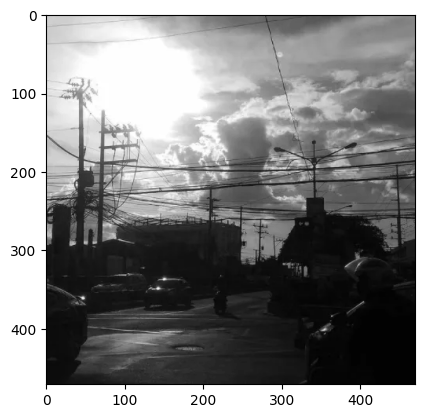

In [423]:
img_01_gray = cv2.cvtColor(img_01,cv2.COLOR_BGR2GRAY)
plt.imshow(img_01_gray, cmap='gray')

In [424]:
# Confirmar proceso viendo que ya no hayan tres canales
img_01_gray.shape

(471, 470)

## __3.Calcule la transformada de fourier__

In [425]:
frec = np.fft.fft2(img_01_gray)
frec = np.fft.fftshift(frec) #transformada ya centrada
frec_abs = np.abs(frec)
magnitud_espectro = 20*np.log(frec_abs)

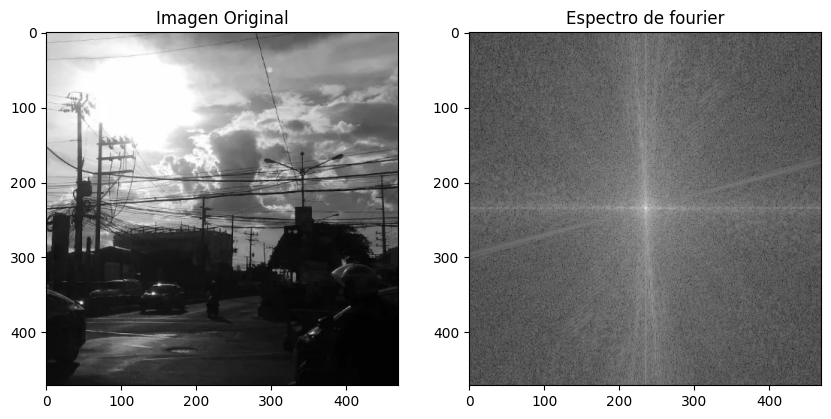

In [426]:
# Viusalizar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_01_gray, cmap='gray')
axs[0].set_title('Imagen Original')
axs[1].imshow(magnitud_espectro, cmap='gray')
axs[1].set_title('Espectro de fourier')
plt.show()

In [427]:
magnitud_espectro

array([[153.31885938, 140.72899361, 120.22773928, ..., 129.60563256,
        130.58517816, 146.3984108 ],
       [146.38192873, 139.93460265, 136.03838919, ..., 146.48656932,
        145.46692528, 145.60737192],
       [149.37300445, 156.68218475, 140.25947167, ..., 143.65194434,
        147.70506524, 150.83953974],
       ...,
       [149.37300445, 150.83953974, 147.70506524, ..., 147.94878643,
        140.25947167, 156.68218475],
       [146.38192873, 145.60737192, 145.46692528, ..., 157.13816018,
        136.03838919, 139.93460265],
       [153.31885938, 146.3984108 , 130.58517816, ..., 154.65579267,
        120.22773928, 140.72899361]])

In [428]:
print(f'shape - frecuencia: {frec.shape}')
print(f'shape - espectro de magnitud: {magnitud_espectro.shape}')

shape - frecuencia: (471, 470)
shape - espectro de magnitud: (471, 470)


## __4.Cree una máscara y utilícela para cambiar la información de la imagen en el dominio de las frecuencias__

### __Filtro de sobel__

In [429]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

# grad_x: identifica el gradiente en x para señalar los Bordes en x
grad_x = cv2.Sobel(img_01_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(img_01_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

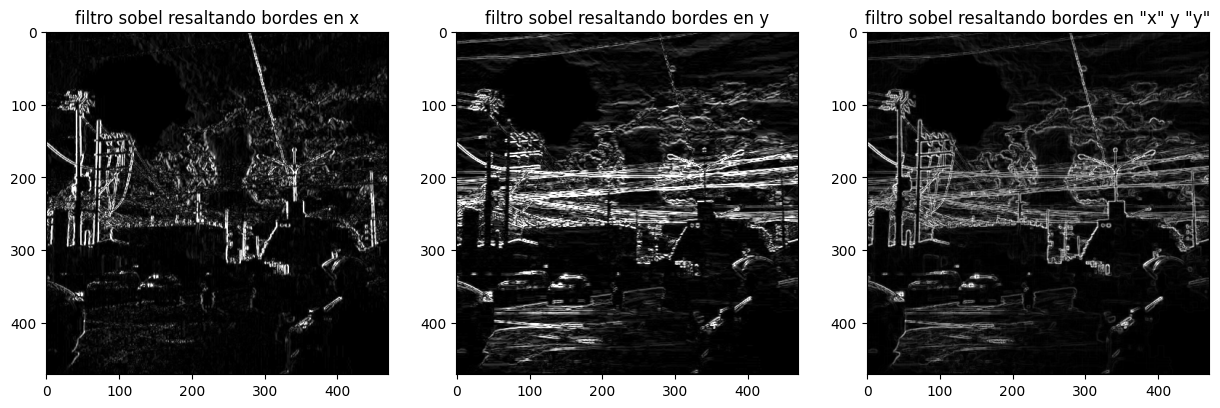

In [430]:
fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].imshow(abs_grad_x, cmap='gray')
axs[0].set_title('filtro sobel resaltando bordes en x')
axs[1].imshow(abs_grad_y, cmap='gray')
axs[1].set_title('filtro sobel resaltando bordes en y')
axs[2].imshow(grad, cmap='gray')
axs[2].set_title('filtro sobel resaltando bordes en "x" y "y"')
plt.show()

#### Espectros del filtro

Text(0.5, 1.0, 'Espectro del filtro "x" y "y"')

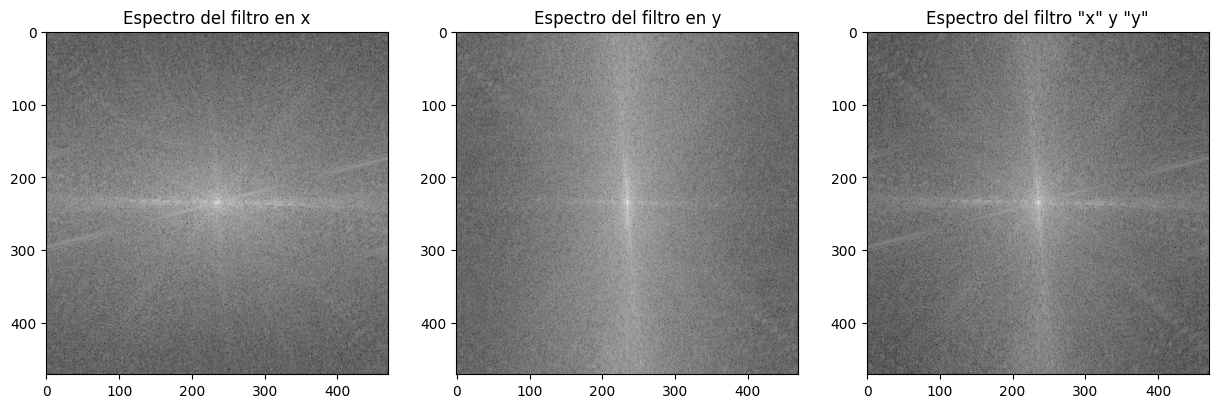

In [431]:
me_abs_x = np.fft.fft2(abs_grad_x)
me_abs_x = np.fft.fftshift(me_abs_x) # Para mover las frecuencias al centro
me_abs_x = np.abs(me_abs_x) # Calcula la magnitud del arreglo de las frecuencias
me_abs_x = 20*np.log(me_abs_x) # espectro en escala logaritmica

me_abs_y = np.fft.fft2(abs_grad_y)
me_abs_y = np.fft.fftshift(me_abs_y)
me_abs_y = np.abs(me_abs_y)
me_abs_y = 20*np.log(me_abs_y)

me_abs = np.fft.fft2(grad)
me_abs = np.fft.fftshift(me_abs)
me_abs = np.abs(me_abs)
me_abs = 20*np.log(me_abs)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].imshow(me_abs_x, cmap='gray')
axs[0].set_title('Espectro del filtro en x')
axs[1].imshow(me_abs_y, cmap='gray')
axs[1].set_title('Espectro del filtro en y')
axs[2].imshow(me_abs, cmap='gray')
axs[2].set_title('Espectro del filtro "x" y "y"')

### __Mascaras Pasa alto y pasa bajo__

In [432]:
# Crear una máscara pasa bajo
rows, cols = img_01_gray.shape
center_row, center_col = rows // 2, cols // 2
radius = 30
mask_lp = np.zeros((rows, cols), dtype=np.float64)
cv2.circle(mask_lp, (center_col, center_row), radius, 1, -1)

# Crear una máscara pasa alto (complemento de la máscara pasa bajo)
mask_hp = 1 - mask_lp

In [433]:
 # Aplicar las máscaras en el dominio de la frecuencia
frec_lp = frec * mask_lp
frec_hp = frec * mask_hp

#### Espectros

In [434]:
# Calcular la magnitud de los espectros con escala logarítmica
magnitud_espectro = 20 * np.log(np.abs(frec) + 1)
magnitud_espectro_lp = 20 * np.log(np.abs(frec_lp) + 1)
magnitud_espectro_hp = 20 * np.log(np.abs(frec_hp) + 1)

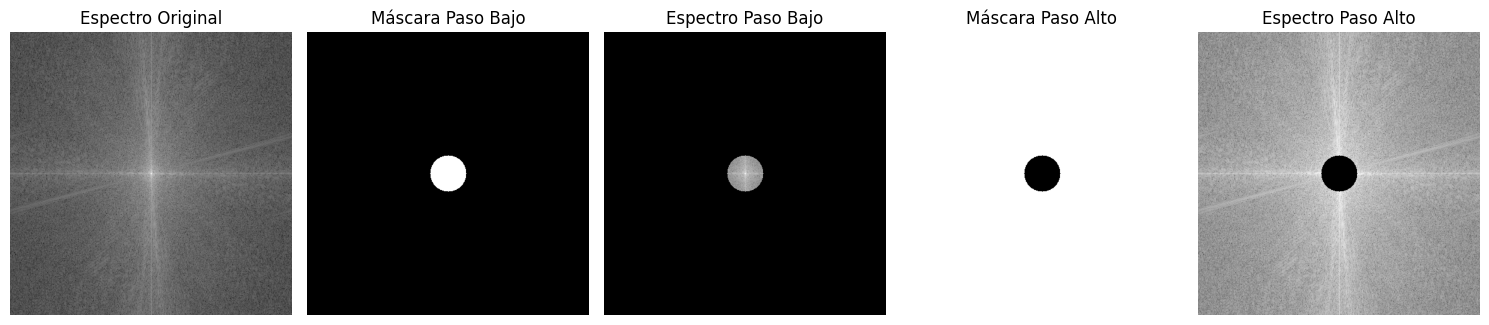

In [435]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(magnitud_espectro, cmap='gray')
plt.title('Espectro Original')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(mask_lp, cmap='gray')
plt.title('Máscara Paso Bajo')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(magnitud_espectro_lp, cmap='gray')
plt.title('Espectro Paso Bajo')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(mask_hp, cmap='gray')
plt.title('Máscara Paso Alto')
plt.axis('off')


plt.subplot(1, 5, 5)
plt.imshow(magnitud_espectro_hp, cmap='gray')
plt.title('Espectro Paso Alto')
plt.axis('off')


plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


## __5. Reconstruya la imagen en el dominio espacial__

### __Reconstruccion con filtro de sobel__

In [436]:
# Aplicar las máscaras a la transformada de Fourier
masks = [abs_grad_y, abs_grad_x, grad_x, grad_y]
titles = ['abs_grad_y', 'abs_grad_x', 'grad_x', 'grad_y']

reconstructed_images = []

for mask in masks:
    frecs = mask * frec
    #f_frecs = np.fft.ifftshift(frecs)
    img_back = np.fft.ifft2(frecs)
    img_back = np.abs(img_back)
    reconstructed_images.append(img_back)

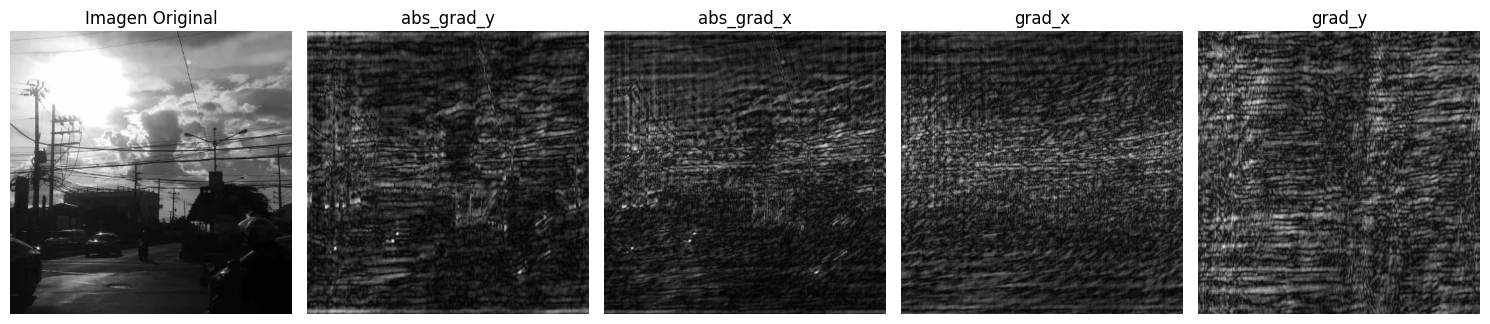

In [437]:
# Mostrar las imágenes originales y las reconstruidas
plt.figure(figsize=(15, 10))

plt.subplot(2, len(reconstructed_images) + 1, 1)
plt.imshow(img_01_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar las imágenes reconstruidas
for i, img in enumerate(reconstructed_images):
    plt.subplot(2, len(reconstructed_images) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'imagen filtrada')

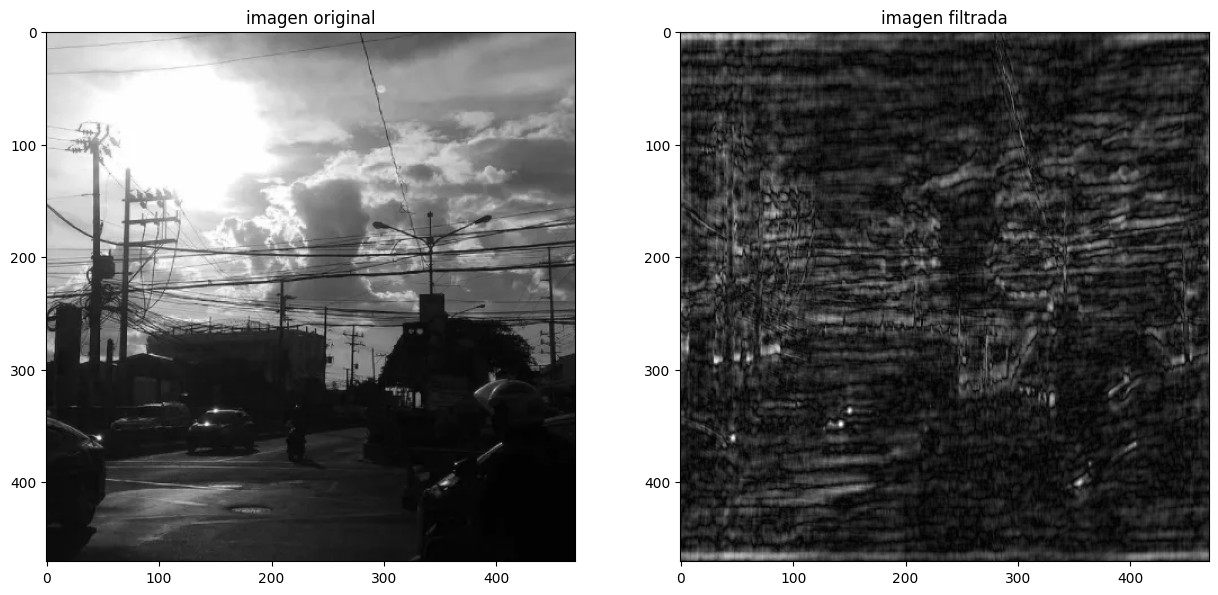

In [438]:
mask = abs_grad_y
frecs = mask * frec

#f_frecs = np.fft.ifftshift(frecs)
img_back = np.fft.ifft2(frecs)
img_back = np.abs(img_back)

fig, axs = plt.subplots(1,2, figsize = (15,15))
axs[0].imshow(img_01_gray, cmap='gray')
axs[0].set_title('imagen original')
axs[1].imshow(img_back, cmap='gray')
axs[1].set_title('imagen filtrada')

### Reconstruccion Mascaras pasa bajo y pasa alto

In [439]:
# Calcular la transformada inversa para obtener las imágenes modificadas
img_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(frec_lp))).astype(np.uint8)
img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(frec_hp))).astype(np.uint8)

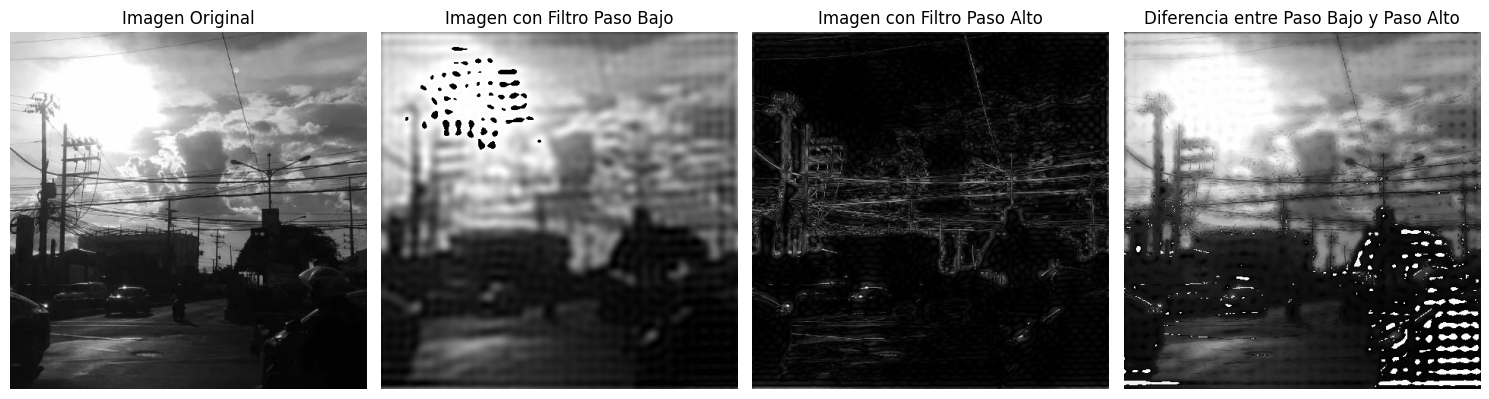

In [440]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_01_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_lp, cmap='gray')
plt.title('Imagen con Filtro Paso Bajo')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_hp, cmap='gray')
plt.title('Imagen con Filtro Paso Alto')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(np.abs(img_lp - img_hp), cmap='gray')
plt.title('Diferencia entre Paso Bajo y Paso Alto')
plt.axis('off')

plt.tight_layout()
plt.show()

# Como afecta seleccion Mascara

En el taller, se pudo observar cómo la selección cuidadosa de máscaras en el dominio de las frecuencias tuvo un impacto significativo en el procesamiento de imágenes. Se notó que al aplicar máscaras derivadas del filtro Sobel, se logró mitigar e incluso eliminar líneas horizontales no deseadas en una imagen. Sin embargo, este proceso conllevó la pérdida de información en la imagen, lo que podría afectar la calidad general de la imagen procesada.

Un aspecto interesante fue la variabilidad en los efectos de diferentes máscaras en diferentes imágenes. Por ejemplo, una máscara efectiva para eliminar líneas horizontales no garantizaba el mismo éxito en corregir problemas de sobreexposición en otra imagen. Esto subraya la importancia de seleccionar máscaras de manera específica según el problema a abordar en cada imagen.

En conclusión, la selección de máscaras en el procesamiento de imágenes en el dominio de las frecuencias es un aspecto crítico que puede influir significativamente en la calidad y el resultado final de la imagen procesada. Es esencial probar y ajustar diferentes máscaras para encontrar la combinación óptima que logre el efecto deseado sin comprometer excesivamente la calidad de la imagen.